In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import pandas as pd

import pickle

plt.rcParams["figure.figsize"] = (15,10)

We will import the same range of data we used for Lab05.

In [3]:
higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
data_higgs = pickle.load(higgs)
data_higgs.keys()
higgs.close()

In [4]:
qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
data_qcd = pickle.load(qcd)
data_qcd.keys()
qcd.close()

In [5]:
data_higgs

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [6]:
data_qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


# Problem 1

We are asked to make a stacked histogram for the feature mass.

In [11]:
print(np.max(data_higgs['mass']))
print(np.min(data_higgs['mass']))
print(np.max(data_qcd['mass']))
print(np.min(data_qcd['mass']))

142.43960717193664
8.971221491285528
321.39799320084865
9.292817333809852


A range of [0, 330] will work fine with our mass data.

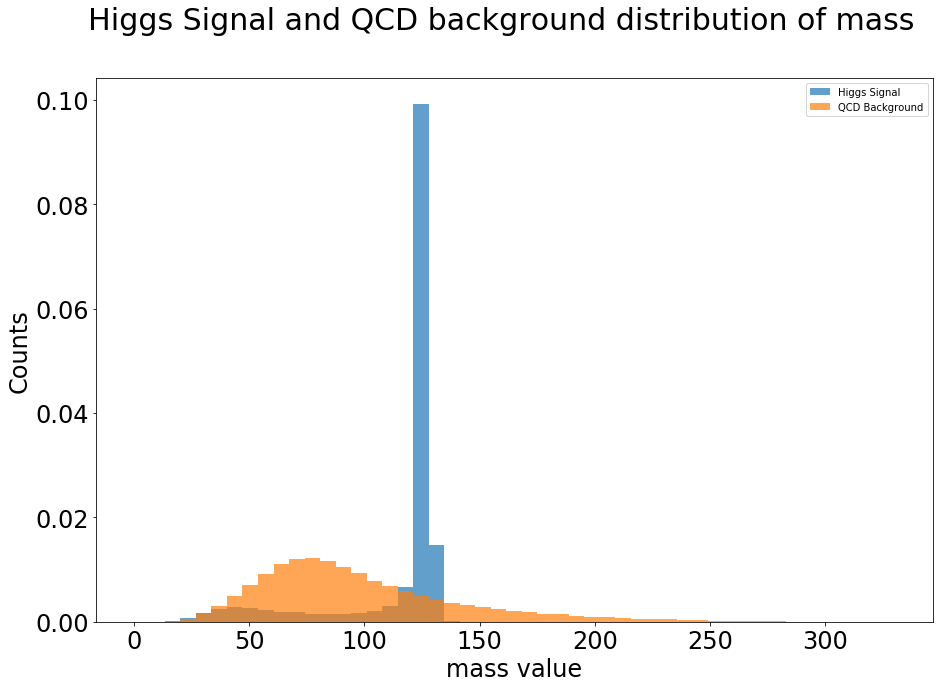

In [66]:
plt.suptitle('Higgs Signal and QCD background distribution of mass', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
#plt.yscale('log')
plt.hist(data_higgs['mass'], bins = np.linspace(0,330,50), density=True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['mass'], bins = np.linspace(0,330,50), density=True, alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [44]:
mean = np.mean(data_qcd['mass'])
mean

97.73804095682556

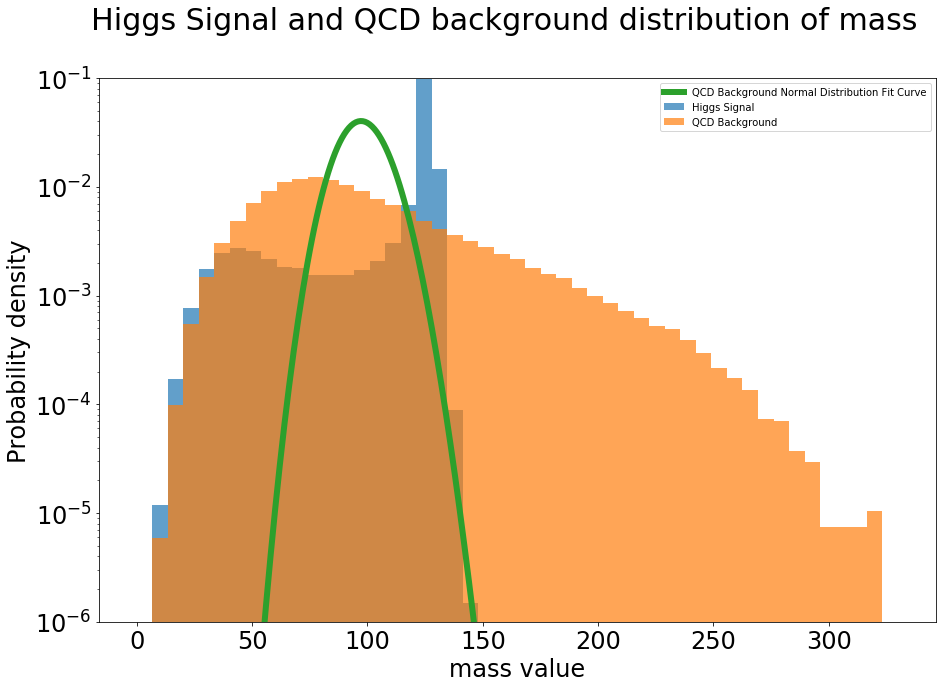

In [45]:
plt.suptitle('Higgs Signal and QCD background distribution of mass', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.hist(data_higgs['mass'], bins = np.linspace(0,330,50), density = True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['mass'], bins = np.linspace(0,330,50), density = True, alpha = 0.7, label = 'QCD Background')
x = np.arange(330)
plt.ylim([10 ** -6, 0.1])
plt.plot(x, stats.poisson.pmf(x,mean,0 ), label = 'QCD Background Normal Distribution Fit Curve', linewidth = 6)
plt.legend()
plt.show()

In [50]:
mean_signal = np.mean(data_higgs['mass'])
mean_signal

114.8923866455211

In [51]:
value = stats.poisson.sf(mean_signal, mean, loc=0)
sigma = stats.norm.isf(value, 0, 1)
sigma

1.6666117786403256

sigma5 = stats.norm.sf(5, 0, 1)
value = stats.poisson.isf(sigma5, mean, loc=0)
value

In [47]:
len(data_higgs['mass']) / (len(data_qcd['mass']) ** 0.5)

316.2277660168379

In [125]:
100/(20000 ** 0.5)

0.7071067811865475

# Problem 2

From the plot, it's clear that no Higgs signal have a mass of 150 or more, so we can try selecting mass from [0, 150].

In [92]:
mean = np.mean(data_qcd[data_qcd['mass'] <= 150]['mass'])

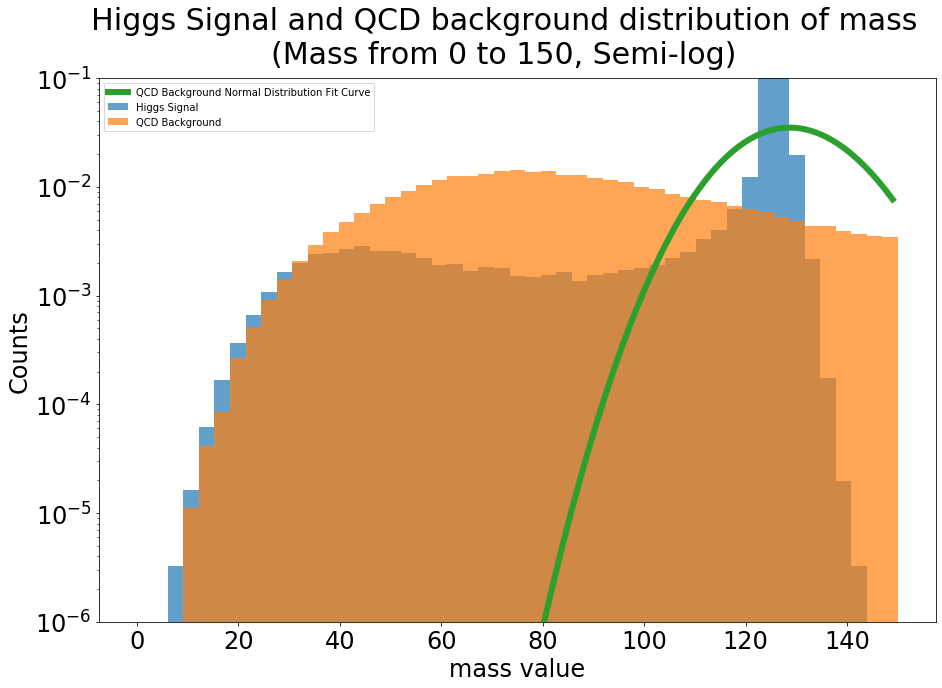

In [98]:
plt.suptitle('Higgs Signal and QCD background distribution of mass\n(Mass from 0 to 150, Semi-log)', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.hist(data_higgs[data_higgs['mass'] <= 150]['mass'], bins = np.linspace(0,150,50), density=True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd[data_qcd['mass'] <= 150]['mass'], bins = np.linspace(0,150,50), density=True, alpha = 0.7, label = 'QCD Background')
x = np.arange(150)
plt.ylim([10 ** -6, 0.1])
plt.plot(x, stats.poisson.pmf(x,mean,0 ), label = 'QCD Background Normal Distribution Fit Curve', linewidth = 6)
plt.legend()
plt.show()

In [99]:
n_higgs = len(data_higgs[data_higgs['mass'] <= 150]['mass'])
n_higgs

100000

In [100]:
n_qcd = len(data_qcd[data_qcd['mass'] <= 150]['mass'])
n_qcd

87704

In [96]:
n_higgs/(n_qcd ** 0.5)

337.66830628289034

Most of the Higgs are from [120,140], so we can try using that range.

In [97]:
mean = np.mean(data_qcd[(data_qcd['mass'] <= 140) & (data_qcd['mass'] >= 120)]['mass'])
mean

129.18572288896672

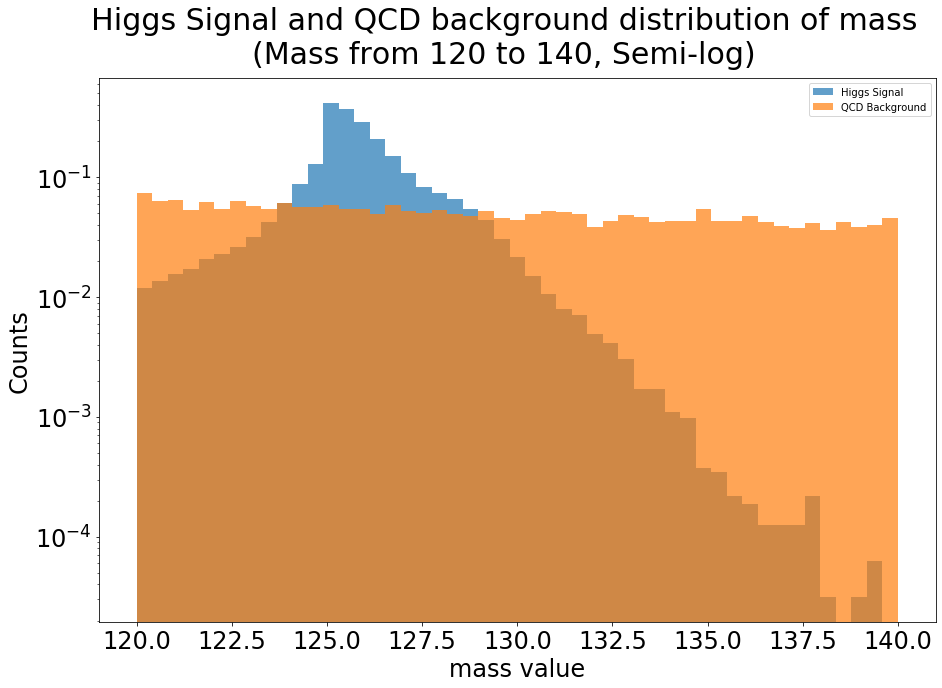

In [76]:
plt.suptitle('Higgs Signal and QCD background distribution of mass\n(Mass from 120 to 140, Semi-log)', fontsize=30)
plt.xlabel('mass value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.hist(data_higgs[(data_higgs['mass'] <= 140) & (data_higgs['mass'] >= 120)]['mass'], bins = np.linspace(120,140,50), density=True, alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd[(data_qcd['mass'] <= 140) & (data_qcd['mass'] >= 120)]['mass'], bins = np.linspace(120,140,50), density=True, alpha = 0.7, label = 'QCD Background')
#x = np.arange(150)
#plt.ylim([10 ** -6, 0.1])
#plt.plot(x, stats.poisson.pmf(x,mean,0 ), label = 'QCD Background Normal Distribution Fit Curve', linewidth = 6)
plt.legend()
plt.show()

In [118]:
n_higgs = len(data_higgs[(data_higgs['mass'] <= 140) & (data_higgs['mass'] >= 120)]['mass'])
n_qcd = len(data_qcd[(data_qcd['mass'] <= 140) & (data_qcd['mass'] >= 120)]['mass'])
n_higgs/(n_qcd ** 0.5)

832.6275943790848

This is a lot higher than the previous one. good!

# Problem 3

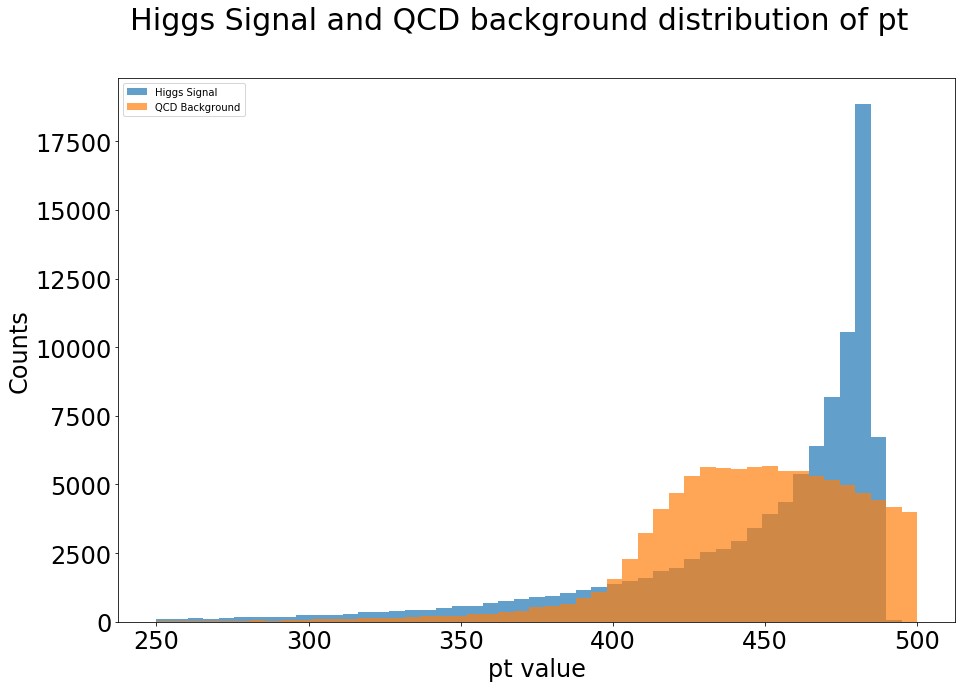

In [78]:
plt.suptitle('Higgs Signal and QCD background distribution of pt ', fontsize=30)
plt.xlabel('pt value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['pt'], bins = np.linspace(250,500,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

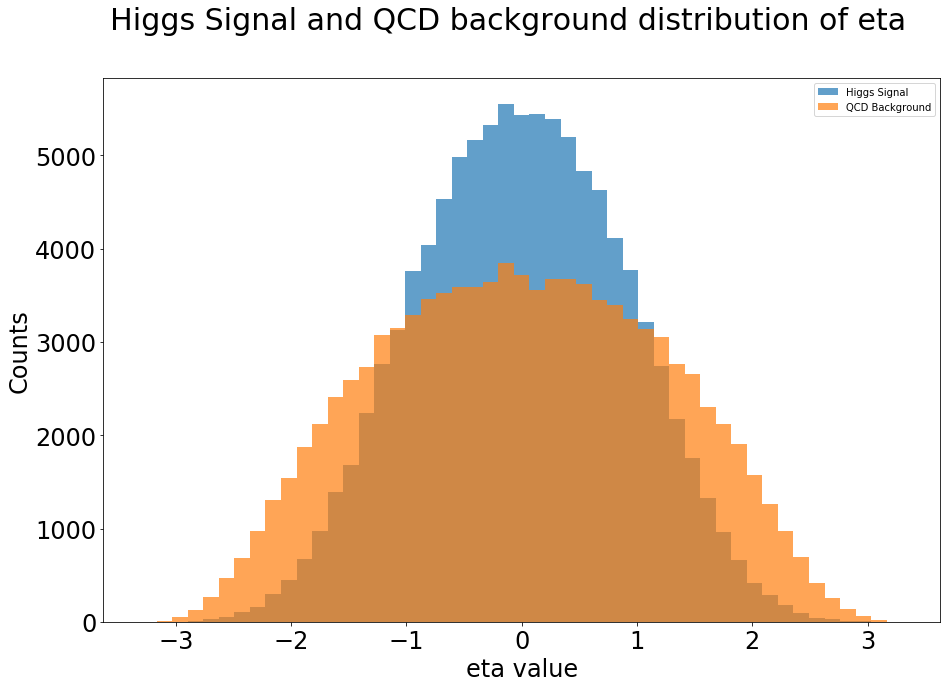

In [79]:
plt.suptitle('Higgs Signal and QCD background distribution of eta', fontsize=30)
plt.xlabel('eta value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['eta'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

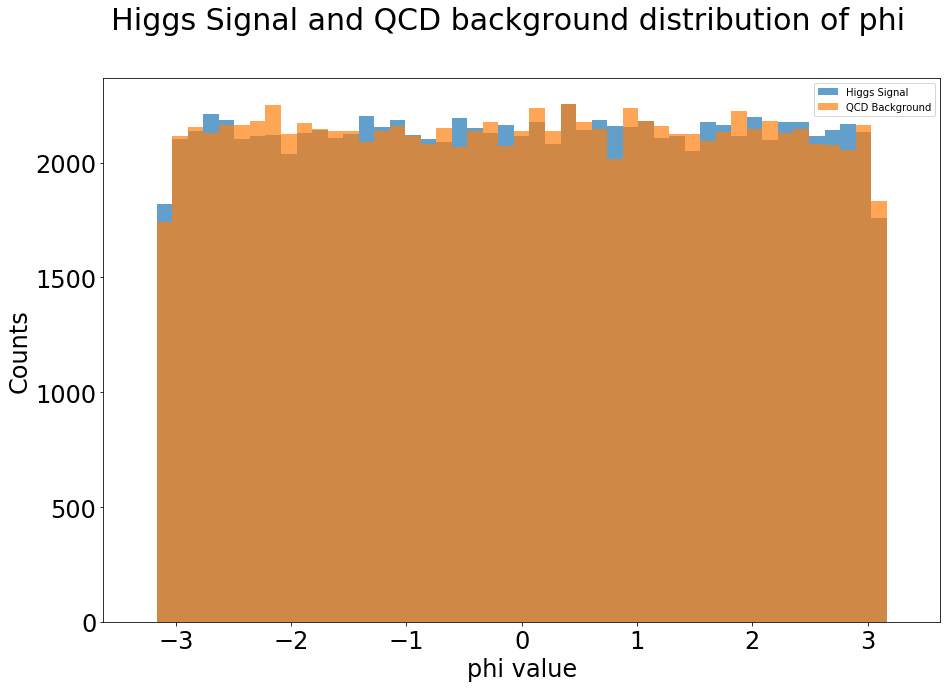

In [80]:
plt.suptitle('Higgs Signal and QCD background distribution of phi', fontsize=30)
plt.xlabel('phi value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['phi'], bins = np.linspace(-3.3,3.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

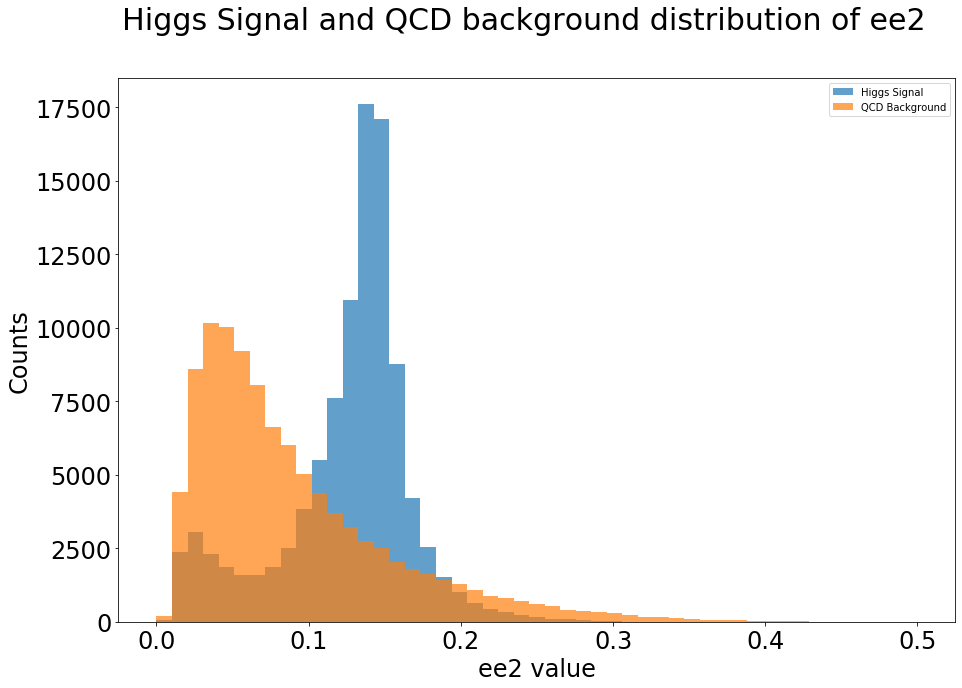

In [82]:
plt.suptitle('Higgs Signal and QCD background distribution of ee2', fontsize=30)
plt.xlabel('ee2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee2'], bins = np.linspace(0,0.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

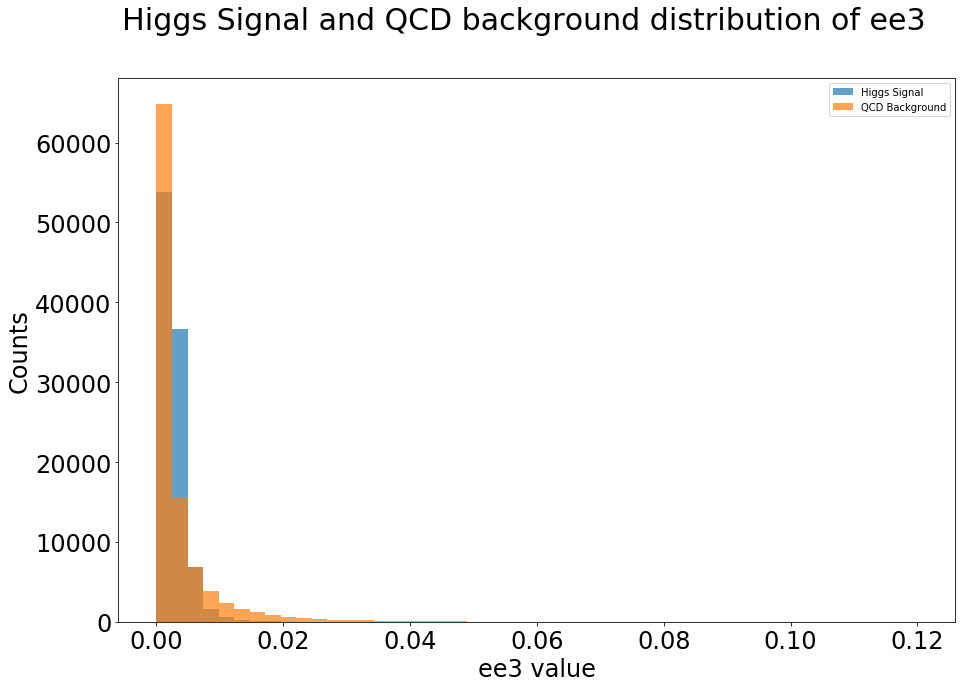

In [83]:
plt.suptitle('Higgs Signal and QCD background distribution of ee3', fontsize=30)
plt.xlabel('ee3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['ee3'], bins = np.linspace(0,0.12,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

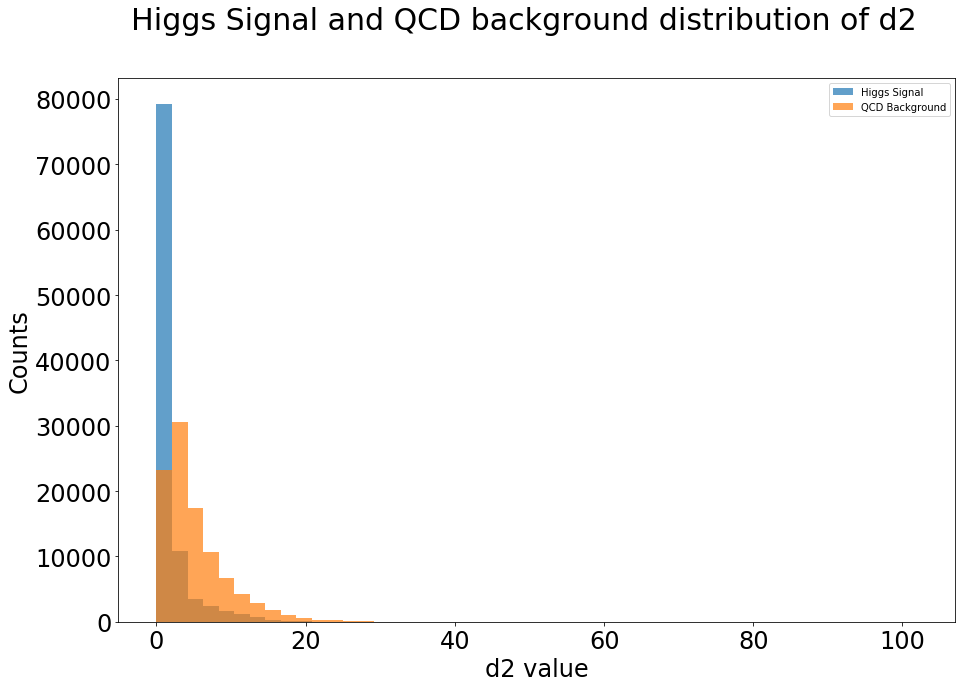

In [84]:
plt.suptitle('Higgs Signal and QCD background distribution of d2', fontsize=30)
plt.xlabel('d2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['d2'], bins = np.linspace(0,102,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

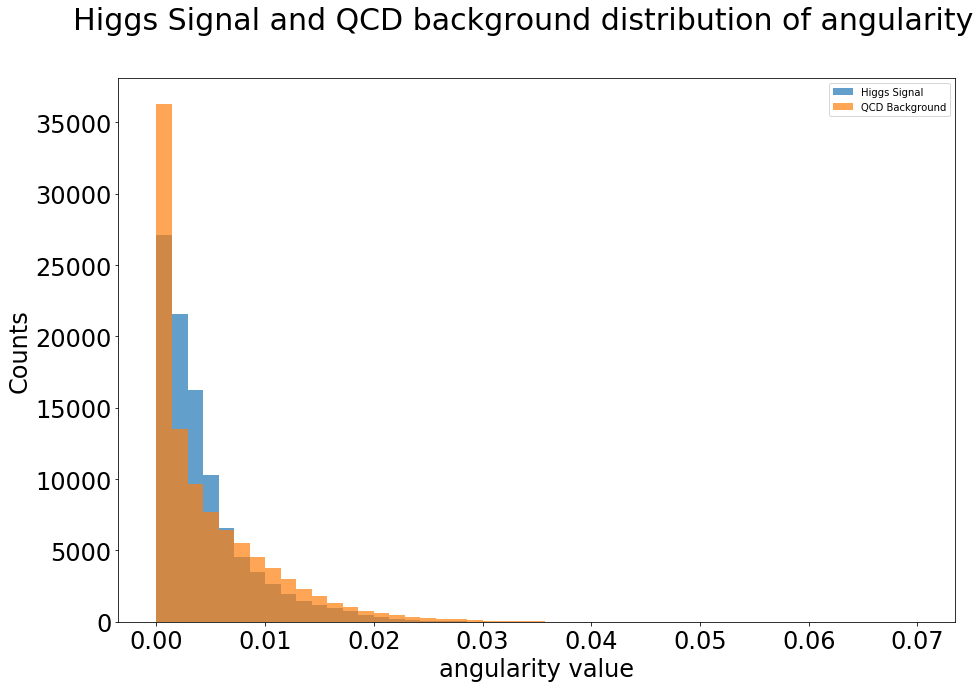

In [85]:
plt.suptitle('Higgs Signal and QCD background distribution of angularity', fontsize=30)
plt.xlabel('angularity value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['angularity'], bins = np.linspace(0,0.07,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

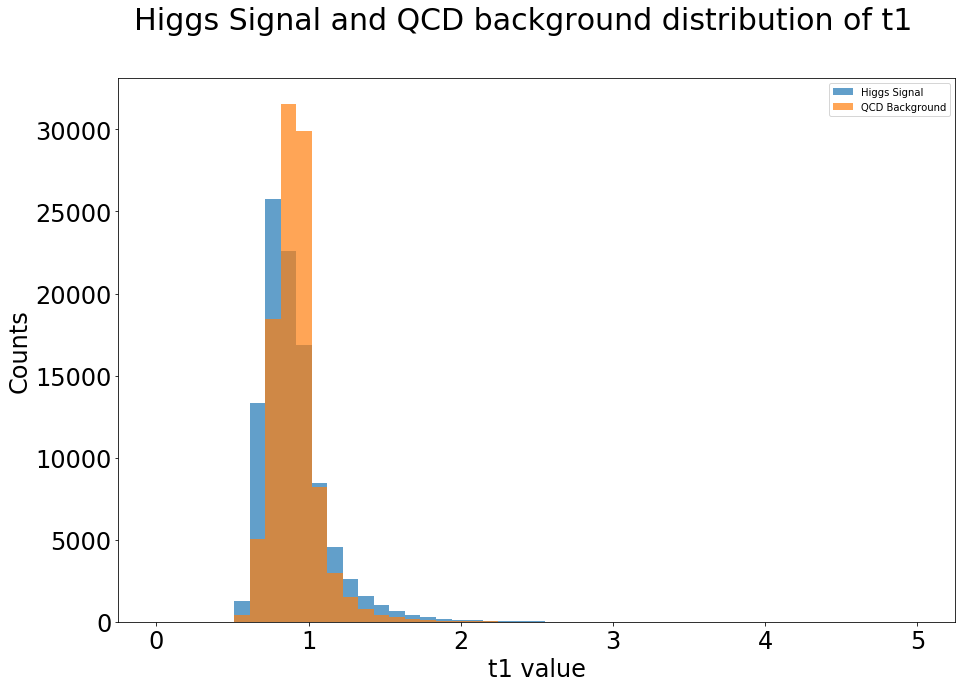

In [86]:
plt.suptitle('Higgs Signal and QCD background distribution of t1', fontsize=30)
plt.xlabel('t1 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t1'], bins = np.linspace(0,5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

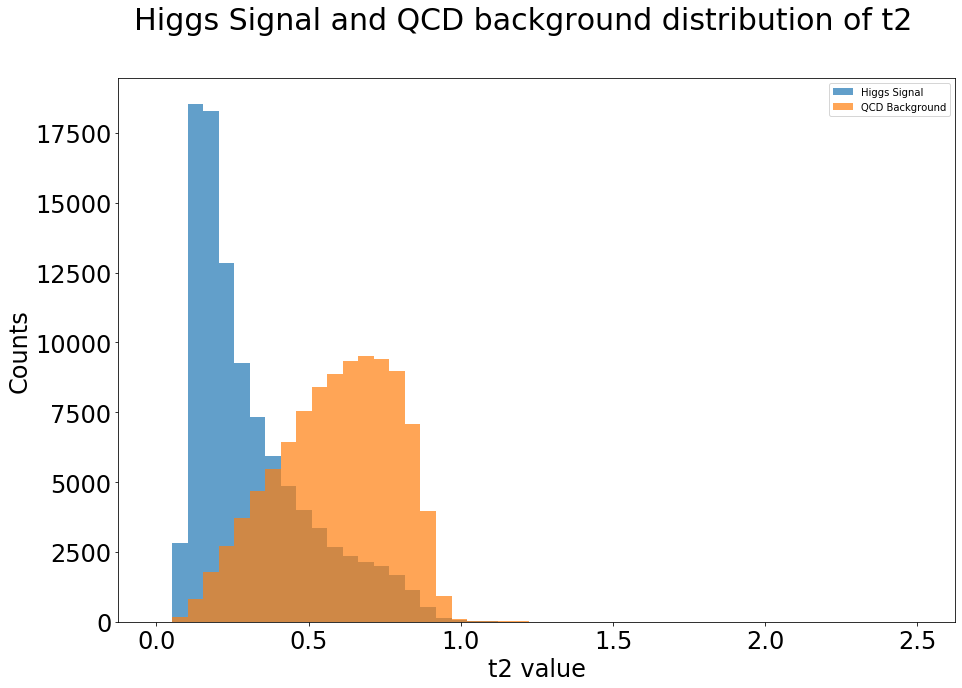

In [87]:
plt.suptitle('Higgs Signal and QCD background distribution of t2', fontsize=30)
plt.xlabel('t2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t2'], bins = np.linspace(0,2.5,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

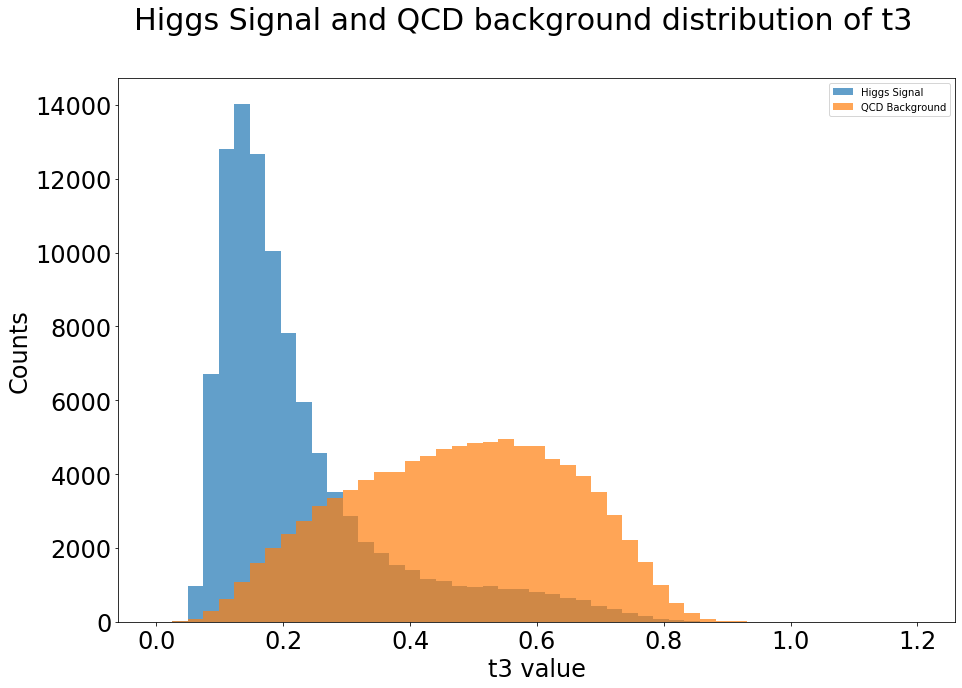

In [88]:
plt.suptitle('Higgs Signal and QCD background distribution of t3', fontsize=30)
plt.xlabel('t3 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t3'], bins = np.linspace(0,1.2,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

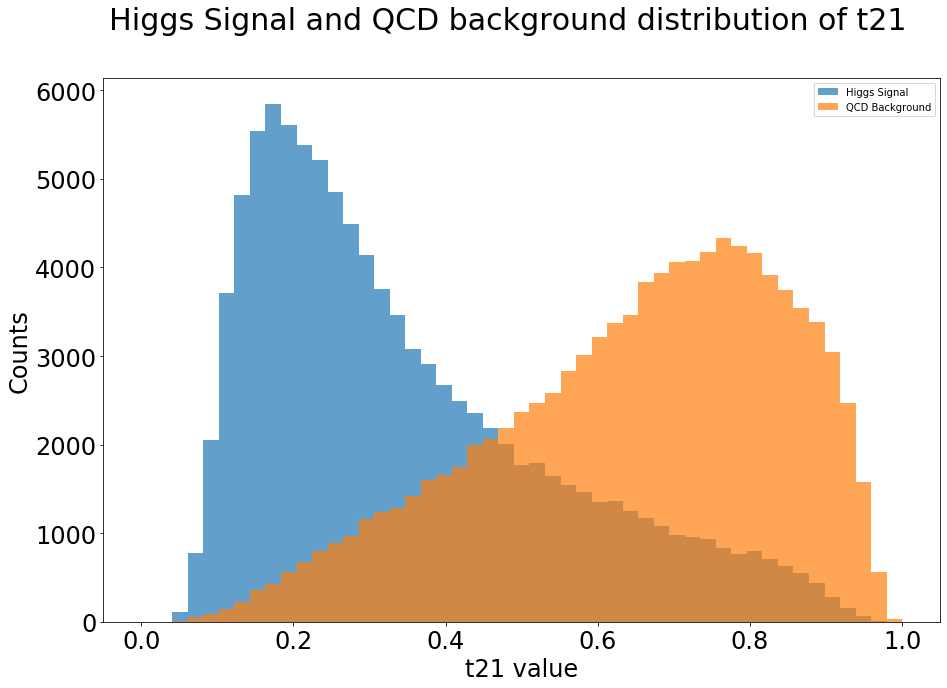

In [89]:
plt.suptitle('Higgs Signal and QCD background distribution of t21', fontsize=30)
plt.xlabel('t21 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t21'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

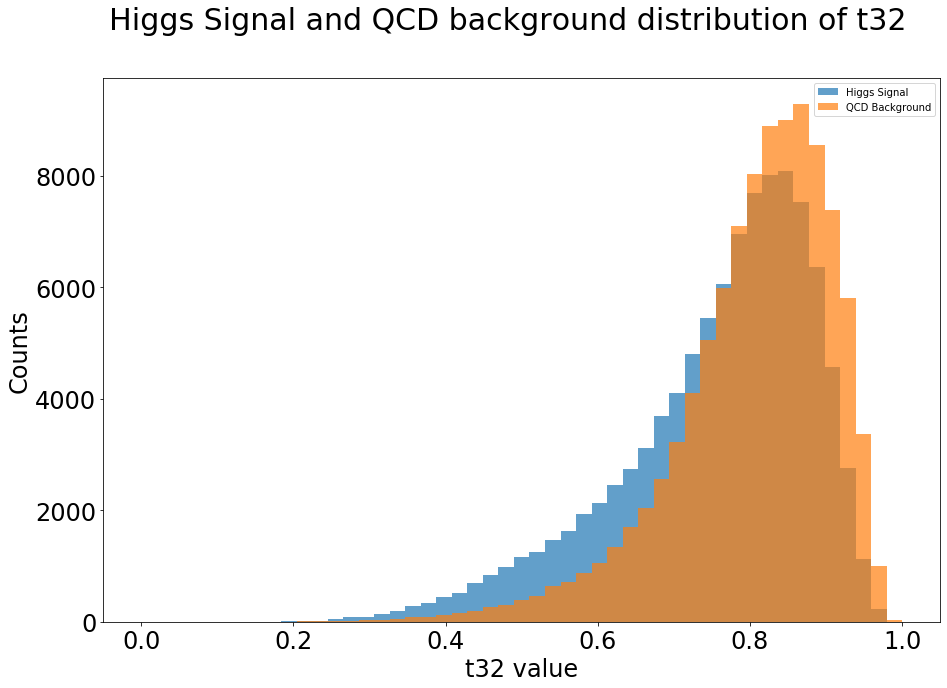

In [90]:
plt.suptitle('Higgs Signal and QCD background distribution of t32', fontsize=30)
plt.xlabel('t32 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['t32'], bins = np.linspace(0,1,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

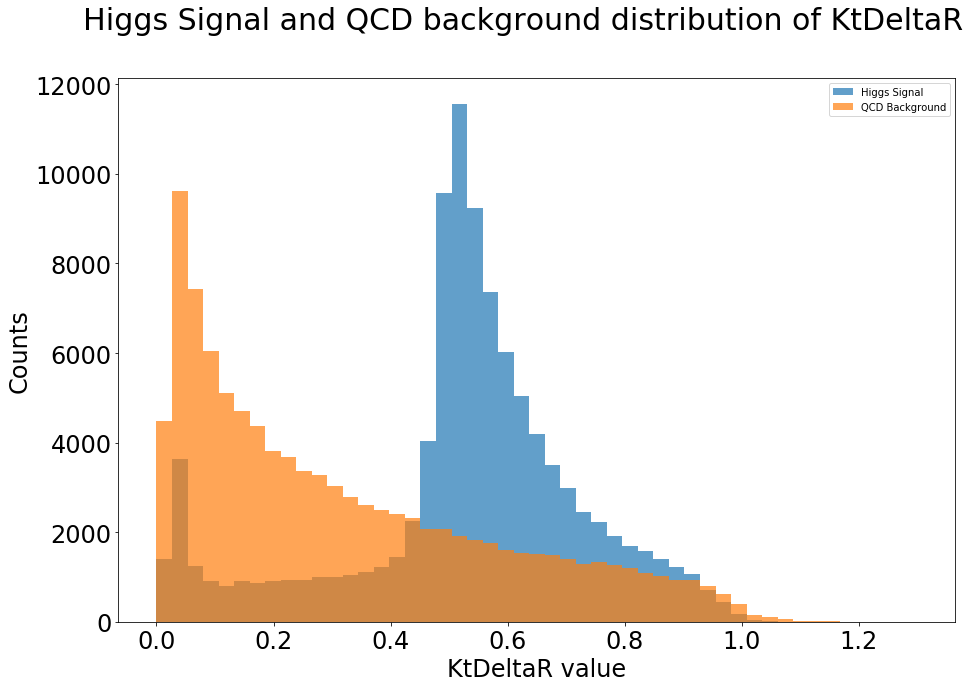

In [91]:
plt.suptitle('Higgs Signal and QCD background distribution of KtDeltaR', fontsize=30)
plt.xlabel('KtDeltaR value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd['KtDeltaR'], bins = np.linspace(0,1.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

Let's try t21.

[0, 0.5] seems to be a good choice.

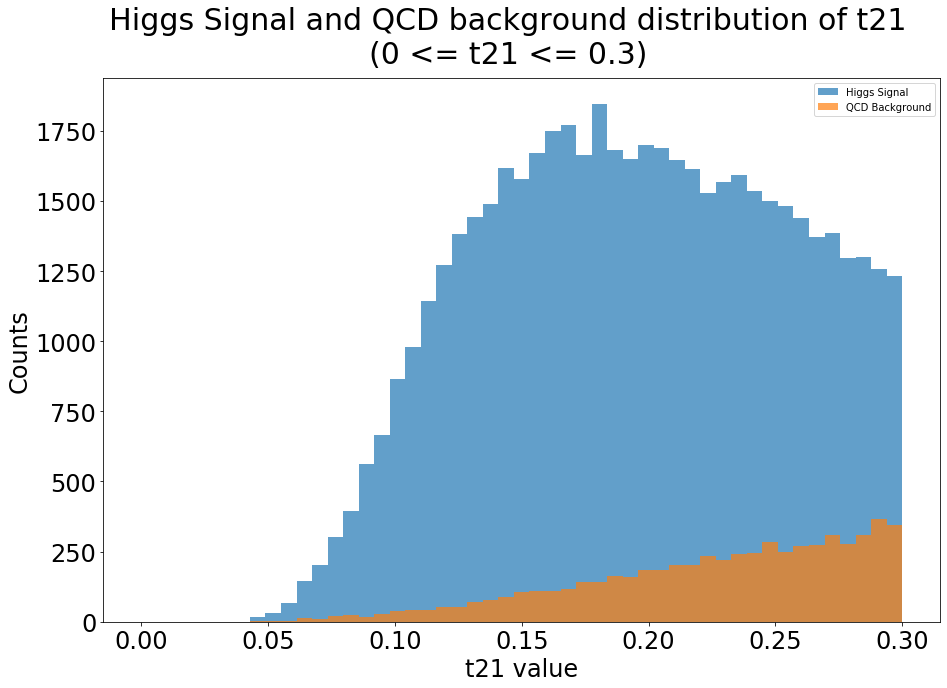

In [121]:
plt.suptitle('Higgs Signal and QCD background distribution of t21\n(0 <= t21 <= 0.3)', fontsize=30)
plt.xlabel('t21 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs[data_higgs['t21'] <= 0.3]['t21'], bins = np.linspace(0,0.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd[data_qcd['t21'] <= 0.3]['t21'], bins = np.linspace(0,0.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [122]:
n_higgs = len(data_higgs[data_higgs['t21'] <= 0.3]['t21'])
n_qcd = len(data_qcd[data_qcd['t21'] <= 0.3]['t21'])
n_higgs/(n_qcd ** 0.5)

660.3634104054755

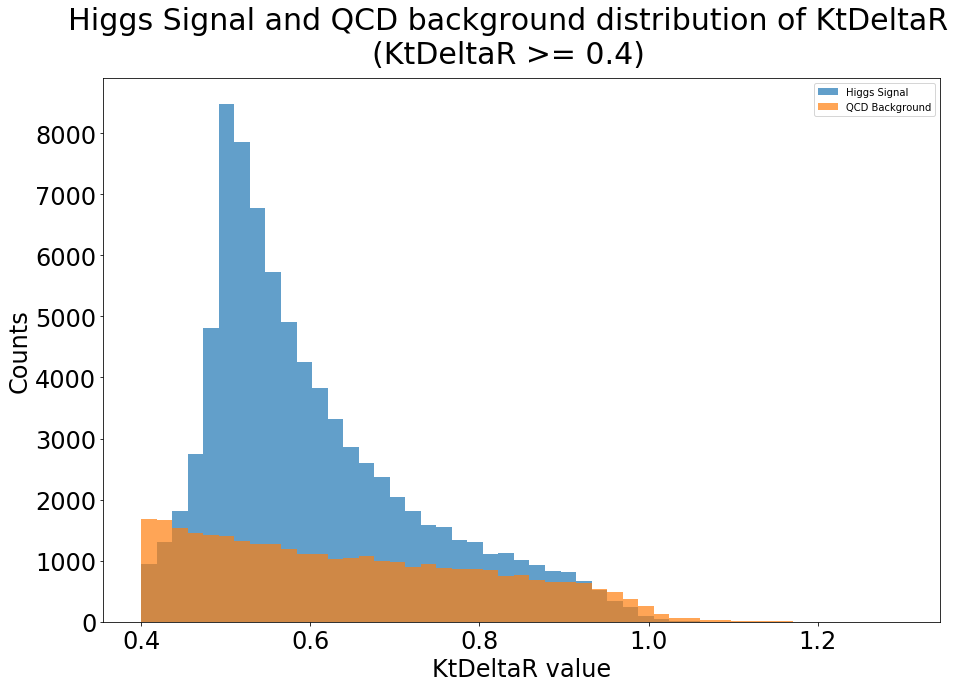

In [119]:
plt.suptitle('Higgs Signal and QCD background distribution of KtDeltaR\n(KtDeltaR >= 0.4)', fontsize=30)
plt.xlabel('KtDeltaR value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs[data_higgs['KtDeltaR'] >= 0.4]['KtDeltaR'], bins = np.linspace(0.4,1.3,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd[data_qcd['KtDeltaR'] >= 0.4]['KtDeltaR'], bins = np.linspace(0.4,1.3,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [120]:
n_higgs = len(data_higgs[data_higgs['KtDeltaR'] >= 0.4]['KtDeltaR'])
n_qcd = len(data_qcd[data_qcd['KtDeltaR'] >= 0.4]['KtDeltaR'])
n_higgs/(n_qcd ** 0.5)

451.1677546811813

Oof, still no good

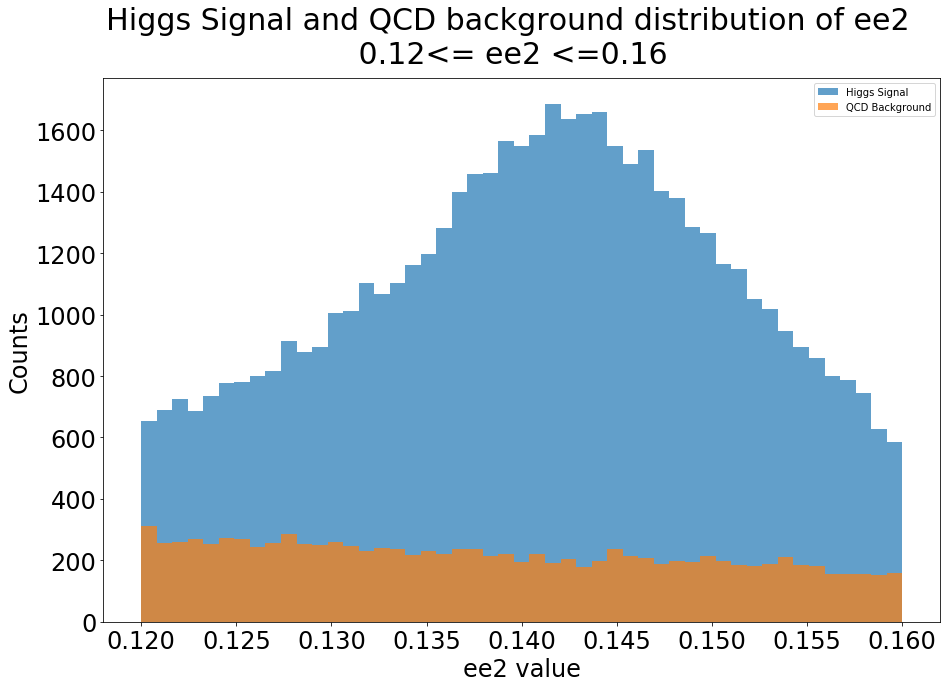

In [123]:
plt.suptitle('Higgs Signal and QCD background distribution of ee2\n 0.12<= ee2 <=0.16', fontsize=30)
plt.xlabel('ee2 value', fontsize = 24)
plt.ylabel('Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data_higgs[(data_higgs['ee2'] <= 0.16) & (data_higgs['ee2'] >=0.12)]['ee2'], bins = np.linspace(0.12,0.16,50), alpha = 0.7, label = 'Higgs Signal')
plt.hist(data_qcd[(data_qcd['ee2'] <= 0.16) & (data_qcd['ee2'] >=0.12)]['ee2'], bins = np.linspace(0.12,0.16,50), alpha = 0.7, label = 'QCD Background')
plt.legend()
plt.show()

In [124]:
n_higgs = len(data_higgs[(data_higgs['ee2'] <= 0.16) & (data_higgs['ee2'] >=0.12)]['ee2'])
n_qcd = len(data_qcd[(data_qcd['ee2'] <= 0.16) & (data_qcd['ee2'] >=0.12)]['ee2'])
n_higgs/(n_qcd ** 0.5)

526.039313822401